In [1]:
import torch
import matplotlib.pyplot as plt

In [104]:
def f(x):
  return x + 1

def L(x, l):
  return f(x) + l * (x @ x - 4)

x = torch.tensor([1.0], requires_grad=True)
l = torch.tensor([5.0], requires_grad=True)

xs = torch.zeros(100)
ls = torch.zeros(100)

for idx in range(100):
  if l.grad is not None:
    l.grad.zero_()
  if x.grad is not None:
    x.grad.zero_()

  cost = L(x, l)
  
  l.retain_grad()
  x.retain_grad()

  cost.backward()

  l = l + 0.5 * l.grad
  x = x - 0.5 * x.grad
  # print(f'l: {l.item():.5f}')
  # print(f'x: {x}')

  # print(f'{idx:03}: value of lagrangian function - {cost.item():.5f}')
  # print(f'value of original function - {f(x)}')
  xs[idx] = x
  ls[idx] = l



/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484809662/work/build/aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


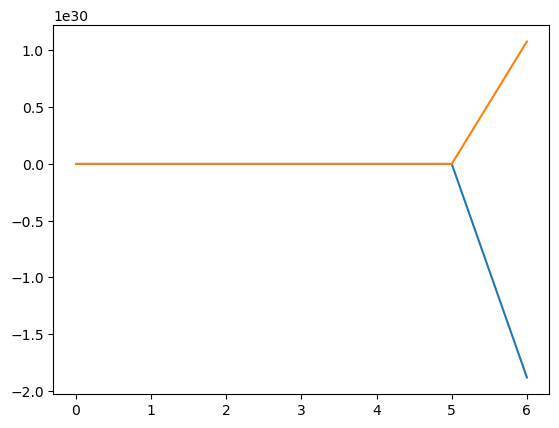

In [105]:
plt.plot(xs.detach().numpy())
plt.plot(ls.detach().numpy())

In [101]:
print(l)
print(x)

tensor([nan], grad_fn=<AddBackward0>)
tensor([nan], grad_fn=<SubBackward0>)


In [78]:
L(x, l)

tensor([-1.6543], grad_fn=<AddBackward0>)

In [79]:
torch.norm(x)

tensor(2.3470, grad_fn=<CopyBackwards>)

In [80]:
torch.sqrt(torch.tensor(2.0)) / 2

tensor(0.7071)

In [81]:
f(x)

tensor(0.9026, grad_fn=<DotBackward0>)

In [110]:
x = 0
al = 1

for _ in range(30):
  dx = 1 + 2 * al * x
  dal = x**2 - 2
  x = x - 0.1 * dx
  al = al + 0.1 * dal
  print(f'x: {x:.5f}, al: {al:.5f}')

x: -0.10000, al: 0.80000
x: -0.18400, al: 0.60100
x: -0.26188, al: 0.40439
x: -0.34070, al: 0.21124
x: -0.42631, al: 0.02285
x: -0.52436, al: -0.15897
x: -0.64103, al: -0.33148
x: -0.78353, al: -0.49039
x: -0.96038, al: -0.62899
x: -1.18119, al: -0.73676
x: -1.45524, al: -0.79724
x: -1.78728, al: -0.78547
x: -2.16805, al: -0.66603
x: -2.55685, al: -0.39599
x: -2.85934, al: 0.05776
x: -2.92631, al: 0.67534
x: -2.63106, al: 1.33167
x: -2.03032, al: 1.82392
x: -1.38969, al: 2.03614
x: -0.92377, al: 2.02926
x: -0.64886, al: 1.91460
x: -0.50040, al: 1.75670
x: -0.42459, al: 1.58174
x: -0.39027, al: 1.39977
x: -0.38101, al: 1.21500
x: -0.38843, al: 1.02952
x: -0.40845, al: 0.84460
x: -0.43945, al: 0.66129
x: -0.48133, al: 0.48060
x: -0.53507, al: 0.30377
